Exploratory Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('../ml_data/all_pib_ML.csv')

In [51]:
df.head(10)

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Código UF,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,Pib per capita,adjusted_population,adjusted_funding
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,...,11.0,RO,ARIQUEMES,"2,03%",21.0,"6,35",31.61,"18.368,70",13912.05,5.327668e+06
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,...,11.0,RO,ARIQUEMES,"2,03%",21.0,"6,35",31.61,"18.368,70",78834.95,3.019012e+07
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,...,11.0,RO,CABIXI,"8,81%",21.0,"6,35",31.61,"16.240,46",919.80,2.282065e+05
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,...,11.0,RO,CABIXI,"8,81%",21.0,"6,35",31.61,"16.240,46",5212.20,1.293170e+06
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,...,11.0,RO,COLORADO DO OESTE,"6,92%",21.0,"6,35",31.61,"12.273,84",2713.95,4.222213e+05
5,2012,1100064,Urbana,86.9,5.6,7.5,733,54,3,32,...,11.0,RO,COLORADO DO OESTE,"6,92%",21.0,"6,35",31.61,"12.273,84",15379.05,2.392587e+06
6,2012,1100072,Rural,91.4,5.3,3.3,155,12,2,6,...,11.0,RO,CORUMBIARA,"4,71%",21.0,"6,35",31.61,"20.618,11",1279.50,3.427010e+05
7,2012,1100072,Urbana,83.3,4.4,12.3,237,19,1,13,...,11.0,RO,CORUMBIARA,"4,71%",21.0,"6,35",31.61,"20.618,11",7250.50,1.941973e+06
8,2012,1100080,Rural,60.3,18.1,21.6,192,10,1,8,...,11.0,RO,COSTA MARQUES,"4,23%",21.0,"6,35",31.61,"9.341,05",2153.25,7.888205e+05
9,2012,1100080,Urbana,78.0,4.9,17.1,380,28,1,14,...,11.0,RO,COSTA MARQUES,"4,23%",21.0,"6,35",31.61,"9.341,05",12201.75,4.469983e+06


In [52]:
df.nunique()

Ano                        9
Código_IBGE             5280
Localização                2
Aprovação                601
Reprovação               496
Abandono                 447
Matrículas              8127
Docentes                1168
Estabelecimentos         140
Turmas                  1144
Regiao                     5
Código UF                 27
UF                        27
Municipio               5281
Magreza %               1205
Acesso a internet %       33
Unemployed               192
Poverty_Rate             233
Pib per capita         47155
adjusted_population    37621
adjusted_funding       59012
dtype: int64

<Figure size 1200x600 with 0 Axes>

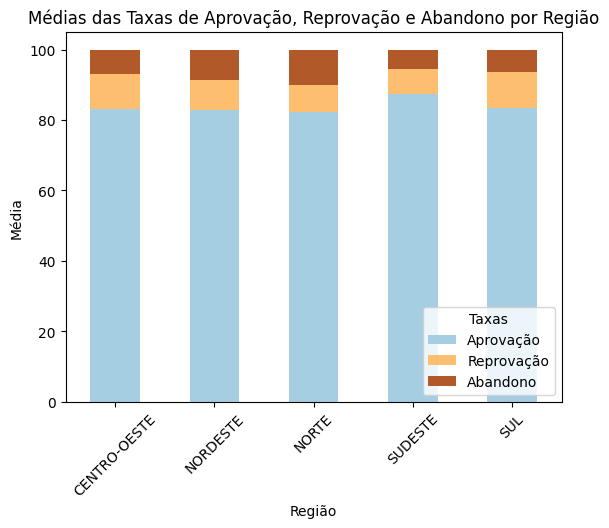

In [53]:
# Calcule as médias das taxas de Aprovação, Reprovação e Abandono por região
medias_por_regiao = df.groupby('Regiao')[['Aprovação', 'Reprovação', 'Abandono']].mean()

# Crie um gráfico de barras empilhadas para comparar as médias das taxas de educação entre as regiões
plt.figure(figsize=(12, 6))
medias_por_regiao.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Médias das Taxas de Aprovação, Reprovação e Abandono por Região')
plt.xlabel('Região')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.legend(loc='lower right', title='Taxas')
plt.show()

In [59]:
df.dtypes

Ano                      int64
Código_IBGE              int64
Localização             object
Aprovação              float64
Reprovação             float64
Abandono               float64
Matrículas              object
Docentes                object
Estabelecimentos         int64
Turmas                  object
Regiao                  object
Código UF              float64
UF                      object
Municipio               object
Magreza %               object
Acesso a internet %    float64
Unemployed              object
Poverty_Rate           float64
Pib per capita          object
adjusted_population    float64
adjusted_funding       float64
dtype: object

In [65]:
# Suponha que você quer remover as linhas com "#DIV/0!" da coluna 'Magreza %'
df = df[df['Magreza %'] != '#DIV/0!']

In [66]:
df.shape

(62041, 21)

In [67]:
# Suponha que 'df' seja o seu DataFrame

# Remover o símbolo '%' e substituir vírgulas por pontos na coluna 'Magreza %'
df['Magreza %'] = df['Magreza %'].str.rstrip('%').str.replace(',', '.').astype(float)

/var/folders/gv/f16by0jn2f57ngs9588479180000gn/T/ipykernel_49523/539436941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magreza %'] = df['Magreza %'].str.rstrip('%').str.replace(',', '.').astype(float)


In [69]:
df.dtypes

Ano                      int64
Código_IBGE              int64
Localização             object
Aprovação              float64
Reprovação             float64
Abandono               float64
Matrículas              object
Docentes                object
Estabelecimentos         int64
Turmas                  object
Regiao                  object
Código UF              float64
UF                      object
Municipio               object
Magreza %              float64
Acesso a internet %    float64
Unemployed              object
Poverty_Rate           float64
Pib per capita          object
adjusted_population    float64
adjusted_funding       float64
dtype: object

In [79]:
df['Unemployed'] = pd.to_numeric(df['Unemployed'])

# Convert "Pib per capita" to float (assuming commas are used as decimal separators)
df['Pib per capita'] = df['Pib per capita'].str.replace(',', '.')
df['Pib per capita'] = df['Pib per capita'].str.replace('.', '')

/var/folders/gv/f16by0jn2f57ngs9588479180000gn/T/ipykernel_49523/4128981600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unemployed'] = pd.to_numeric(df['Unemployed'])
/var/folders/gv/f16by0jn2f57ngs9588479180000gn/T/ipykernel_49523/4128981600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pib per capita'] = df['Pib per capita'].str.replace(',', '.')
/var/folders/gv/f16by0jn2f57ngs9588479180000gn/T/ipykernel_49523/4128981600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [80]:
df.dtypes

Ano                      int64
Código_IBGE              int64
Localização             object
Aprovação              float64
Reprovação             float64
Abandono               float64
Matrículas              object
Docentes                object
Estabelecimentos         int64
Turmas                  object
Regiao                  object
Código UF              float64
UF                      object
Municipio               object
Magreza %              float64
Acesso a internet %    float64
Unemployed             float64
Poverty_Rate           float64
Pib per capita          object
adjusted_population    float64
adjusted_funding       float64
dtype: object

In [83]:
df['Pib per capita'] = df['Pib per capita'].replace(' ', '').replace(',', '.')

/var/folders/gv/f16by0jn2f57ngs9588479180000gn/T/ipykernel_49523/2965927761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pib per capita'] = df['Pib per capita'].replace(' ', '').replace(',', '.')


In [84]:
df.dtypes

Ano                      int64
Código_IBGE              int64
Localização             object
Aprovação              float64
Reprovação             float64
Abandono               float64
Matrículas              object
Docentes                object
Estabelecimentos         int64
Turmas                  object
Regiao                  object
Código UF              float64
UF                      object
Municipio               object
Magreza %              float64
Acesso a internet %    float64
Unemployed             float64
Poverty_Rate           float64
Pib per capita          object
adjusted_population    float64
adjusted_funding       float64
dtype: object

In [87]:
df['Pib per capita'] = pd.to_numeric(df['Pib per capita'])

ValueError: Unable to parse string " 18 368 70 " at position 0

In [89]:
df['Pib per capita'] = pd.to_numeric(df['Pib per capita'])

ValueError: Unable to parse string " 18 368 70 " at position 0

In [93]:
def clean_pib_per_capita(value):
    # Remove espaços em branco e substitui vírgulas por pontos
    value = value.replace(' ', '').replace(',', '.')
    return value

# Aplicar a função de limpeza à coluna 'Pib per capita'
df['Pib per capita'] = df['Pib per capita'].apply(clean_pib_per_capita).astype(float)

ValueError: could not convert string to float: '(145983)'

ValueError: could not convert string to float: ' 18 368 70 '

In [95]:
# Remova os espaços em branco e converta para float
df['Pib per capita'] = df['Pib per capita'].str.replace(' ', '').astype(float)

ValueError: could not convert string to float: '(145983)'

In [98]:
df.head(10)

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Código UF,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,Pib per capita,adjusted_population,adjusted_funding
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,...,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,18 368 70,13912.05,5.327668e+06
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,...,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,18 368 70,78834.95,3.019012e+07
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,...,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,16 240 46,919.80,2.282065e+05
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,...,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,16 240 46,5212.20,1.293170e+06
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,...,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,12 273 84,2713.95,4.222213e+05
5,2012,1100064,Urbana,86.9,5.6,7.5,733,54,3,32,...,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,12 273 84,15379.05,2.392587e+06
6,2012,1100072,Rural,91.4,5.3,3.3,155,12,2,6,...,11.0,RO,CORUMBIARA,4.71,21.0,6.35,31.61,20 618 11,1279.50,3.427010e+05
7,2012,1100072,Urbana,83.3,4.4,12.3,237,19,1,13,...,11.0,RO,CORUMBIARA,4.71,21.0,6.35,31.61,20 618 11,7250.50,1.941973e+06
8,2012,1100080,Rural,60.3,18.1,21.6,192,10,1,8,...,11.0,RO,COSTA MARQUES,4.23,21.0,6.35,31.61,9 341 05,2153.25,7.888205e+05
9,2012,1100080,Urbana,78.0,4.9,17.1,380,28,1,14,...,11.0,RO,COSTA MARQUES,4.23,21.0,6.35,31.61,9 341 05,12201.75,4.469983e+06


In [104]:
df7 = pd.read_csv('/Users/guilhermefraga/PIB dos Munic¡pios2010-2020.csv', sep=';')

In [105]:
df7.head(10)

,Ano,Código UF,UF,Código_IBGE,Município,Pib per capita
0,2010,11,RO,1100015,Alta Floresta D'Oeste,"10731,18"
1,2010,11,RO,1100023,Ariquemes,"15103,86"
2,2010,11,RO,1100031,Cabixi,"11033,62"
3,2010,11,RO,1100049,Cacoal,"15095,15"
4,2010,11,RO,1100056,Cerejeiras,"13037,06"
5,2010,11,RO,1100064,Colorado do Oeste,"10380,21"
6,2010,11,RO,1100072,Corumbiara,"13038,89"
7,2010,11,RO,1100080,Costa Marques,"7852,78"
8,2010,11,RO,1100098,Espigão D'Oeste,"10848,19"
9,2010,11,RO,1100106,Guajará-Mirim,"14363,13"


In [114]:
df7['Pib per capita'] = df7['Pib per capita'].replace(',', '.')

In [112]:
df7['Pib per capita'] = df7['Pib per capita'].astype(float)

In [115]:
df7['Pib per capita'] = df7['Pib per capita'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

Ano                 int64
Código UF           int64
UF                 object
Código_IBGE         int64
Município          object
Pib per capita    float64
dtype: object

In [119]:
df.drop(columns=['Pib per capita'], inplace=True)

/var/folders/gv/f16by0jn2f57ngs9588479180000gn/T/ipykernel_49523/2330517383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Pib per capita'], inplace=True)


In [120]:
df.head()

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,Regiao,Código UF,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,adjusted_population,adjusted_funding
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,NORTE,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,13912.05,5.327668e+06
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,NORTE,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,78834.95,3.019012e+07
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,NORTE,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,919.80,2.282065e+05
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,NORTE,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,5212.20,1.293170e+06
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,NORTE,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,2713.95,4.222213e+05


In [121]:
df7.drop(columns=['UF', 'Município', 'Código UF'], inplace=True)

In [122]:
df_merged = df.merge(df7, on=['Ano', 'Código_IBGE'] , how='inner')

In [123]:
df_merged.head(20)

,Ano,Código_IBGE,Localização,Aprovação,Reprovação,Abandono,Matrículas,Docentes,Estabelecimentos,Turmas,...,Código UF,UF,Municipio,Magreza %,Acesso a internet %,Unemployed,Poverty_Rate,adjusted_population,adjusted_funding,Pib per capita
0,2012,1100023,Rural,92.6,4.0,3.4,498,42,1,15,...,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,13912.05,5.327668e+06,18368.70
1,2012,1100023,Urbana,69.9,16.6,13.5,3453,172,6,136,...,11.0,RO,ARIQUEMES,2.03,21.0,6.35,31.61,78834.95,3.019012e+07,18368.70
2,2012,1100031,Rural,92.1,2.6,5.3,38,6,1,3,...,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,919.80,2.282065e+05,16240.46
3,2012,1100031,Urbana,91.3,5.2,3.5,230,22,1,11,...,11.0,RO,CABIXI,8.81,21.0,6.35,31.61,5212.20,1.293170e+06,16240.46
4,2012,1100064,Rural,90.6,9.2,0.2,415,42,1,15,...,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,2713.95,4.222213e+05,12273.84
5,2012,1100064,Urbana,86.9,5.6,7.5,733,54,3,32,...,11.0,RO,COLORADO DO OESTE,6.92,21.0,6.35,31.61,15379.05,2.392587e+06,12273.84
6,2012,1100072,Rural,91.4,5.3,3.3,155,12,2,6,...,11.0,RO,CORUMBIARA,4.71,21.0,6.35,31.61,1279.50,3.427010e+05,20618.11
7,2012,1100072,Urbana,83.3,4.4,12.3,237,19,1,13,...,11.0,RO,CORUMBIARA,4.71,21.0,6.35,31.61,7250.50,1.941973e+06,20618.11
8,2012,1100080,Rural,60.3,18.1,21.6,192,10,1,8,...,11.0,RO,COSTA MARQUES,4.23,21.0,6.35,31.61,2153.25,7.888205e+05,9341.05
9,2012,1100080,Urbana,78.0,4.9,17.1,380,28,1,14,...,11.0,RO,COSTA MARQUES,4.23,21.0,6.35,31.61,12201.75,4.469983e+06,9341.05


In [124]:
df_merged.dtypes

Ano                      int64
Código_IBGE              int64
Localização             object
Aprovação              float64
Reprovação             float64
Abandono               float64
Matrículas              object
Docentes                object
Estabelecimentos         int64
Turmas                  object
Regiao                  object
Código UF              float64
UF                      object
Municipio               object
Magreza %              float64
Acesso a internet %    float64
Unemployed             float64
Poverty_Rate           float64
adjusted_population    float64
adjusted_funding       float64
Pib per capita         float64
dtype: object

In [125]:
file_path = '../ml_data/all_pib_ML.csv'
df_merged.to_csv(file_path, index=False)